# Case studies for Robot Test paper

In [29]:
import os
import pandas as pd
import numpy as np
import datetime

import run_robot
import prepare_data
from importlib import reload
reload(prepare_data)
reload(run_robot)

Loading PyJulia module...
Loading PyJulia module... Ok!
Loading Robot-dance Julia module...
Loading Robot-dance Julia module... Ok!
Loading modules...
Loading modules... Ok!
Loading Julia library...
Loading Julia library... Ok!
Loading Robot-dance Julia module...
Loading Robot-dance Julia module... Ok!


<module 'run_robot' from '/home/pjssilva/documentos/pesquisa/robot_dance/code/run_robot.py'>

In [22]:
basic_prm = prepare_data.save_basic_parameters(min_level=0.8, rep=2.5, ndays=30)
subnot_factor = 11.6
cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["Mun. São Paulo"], 10000000, subnot_factor, 1, "data/covid_with_drs_07_29.csv")
cities_data


 1/1 Mun. São Paulo                 Mean effective R in the last two weeks = 1.06


,S1,E1,I1,R1,population,icu_capacity,start_date
Mun. São Paulo,0.803731,0.0114,0.005935,0.178934,11869660.0,0.000296,2020-07-29


In [23]:
# Define the basic data for the case studies

# Basic reproduction number
basic_rep = 1.8

# Simulation horizon
# A little more than a year when thevaccine should be here
ndays = 14*2*14

# Mean time in ICU
time_icu = 7

# Lockdown level
lock_level = 0.8

# Define basic paramters
basic_prm = prepare_data.save_basic_parameters(min_level=lock_level, rep=basic_rep, time_icu=time_icu, ndays=ndays)

# Compute initial values

# For cities
# cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["Araçatuba", "São José Do Rio Preto"], 500000, 1)
# cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["São José Do Rio Preto"], 25000, 6, 1)

# For DRS
cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", [], 000000, subnot_factor, 1, "data/covid_with_drs_07_01.csv")

# Sub-groups for figures
sp = ["Mun. São Paulo"]
sp_so = sp + ["Sub região sudoeste - RMSP"]
rmsp = sp + ["Sub região leste - RMSP", "Sub região norte - RMSP", "Sub região oeste - RMSP", "Sub região sudeste - RMSP", "Sub região sudoeste - RMSP"]


 1/22 Araraquara                     Mean effective R in the last two weeks = 1.21
 2/22 Araçatuba                      Mean effective R in the last two weeks = 1.80
 3/22 Baixada Santista               Mean effective R in the last two weeks = 1.03
 4/22 Barretos                       Mean effective R in the last two weeks = 1.49
 5/22 Bauru                          Mean effective R in the last two weeks = 1.57
 6/22 Campinas                       Mean effective R in the last two weeks = 1.39
 7/22 Franca                         Mean effective R in the last two weeks = 1.76
 8/22 Marília                        Mean effective R in the last two weeks = 1.46
 9/22 Mun. São Paulo                 Mean effective R in the last two weeks = 1.00
10/22 Piracicaba                     Mean effective R in the last two weeks = 1.43
11/22 Presidente Prudente            Mean effective R in the last two weeks = 2.07
12/22 Registro                       Mean effective R in the last two weeks = 1.44
13/

In [24]:
# Create a target matrix (max infected level)
ncities, ndays = len(cities_data.index), int(basic_prm["ndays"])
target = 0.8*np.ones((ncities, ndays))
target = prepare_data.save_target(cities_data, target)

# Use a forcedif that releases the cities in the end
force_dif = np.ones((ncities, ndays))
cities_data

,S1,E1,I1,R1,population,icu_capacity,start_date
Araraquara,0.965958,0.005344,0.002775,0.025923,991435.0,0.000145,2020-07-01
Araçatuba,0.963805,0.009078,0.004053,0.023064,764041.0,0.000170,2020-07-01
Baixada Santista,0.839415,0.019177,0.010543,0.130865,1831884.0,0.000255,2020-07-01
Barretos,0.939068,0.012778,0.006432,0.041723,425090.0,0.000176,2020-07-01
Bauru,0.948554,0.010471,0.004931,0.036044,1741281.0,0.000120,2020-07-01
Campinas,0.913127,0.013268,0.006534,0.067071,4562125.0,0.000194,2020-07-01
Franca,0.977500,0.005513,0.002683,0.014304,696336.0,0.000130,2020-07-01
Marília,0.974393,0.004461,0.002329,0.018816,1109670.0,0.000149,2020-07-01
Mun. São Paulo,0.857494,0.012447,0.006930,0.123129,11869660.0,0.000296,2020-07-01
Piracicaba,0.941773,0.011968,0.005847,0.040413,1539600.0,0.000182,2020-07-01


## Add information on the time series that estimate the need of ICUs

We are using the time series adjusted considering that the mean ICU stay is 7 days (which lead to larger ICU capacity).

In [25]:
if basic_prm["time_icu"] == 11:
    # Time series adjusted considering the mean ICU time is 11 days
    ts_sp = np.array([0.0074335, 0.01523406, -0.00186355, 0.0, 1.67356018, -0.68192908, np.sqrt(0.00023883),
        0.007682840158843, 0.007536060983504])
    ts_notsp = np.array([0.00520255, 0.01532709, 0.00044498, 0.0, 1.75553282, -0.76360711, np.sqrt(3.567E-05),
        0.005426447471187, 0.005282217308748])
elif basic_prm["time_icu"] == 7:
    # Time series adjusted considering the mean ICU time is 7 days
    ts_sp = np.array([0.01099859, 0.02236023, 0.00370254, 0.0, 1.79119571, -0.80552926, np.sqrt(0.00034005),
        0.011644768910252, 0.011221496171591])
    ts_notsp = np.array([0.0076481, 0.0218084, 0.00367839, 0.0, 1.81361379, -0.82550856, np.sqrt(8.028E-05),
        0.007907216664912, 0.007721801045322])
else:
    raise NotImplementedError

# Index of the cities that form the Metropolitan area of São Paulo
MASP = np.array([9, 15, 16, 17, 18, 19]) - 1

ts_drs = np.ones((len(cities_data), len(ts_notsp)))
ts_drs *= ts_notsp
ts_drs[MASP, :] = ts_sp
ts_drs = pd.DataFrame(data=ts_drs, index=cities_data.index, columns=[
    "rho_min", "rho_max", "intercept", "trend", "phi_1", "phi_2", "sigma_omega", "state0", "state_less_1"
])
ts_drs["confidence"] = 0.9
ts_drs["time_icu"] = time_icu
cities_data = pd.concat([cities_data, ts_drs], axis=1)
cities_data


,S1,E1,I1,R1,population,icu_capacity,start_date,rho_min,rho_max,intercept,trend,phi_1,phi_2,sigma_omega,state0,state_less_1,confidence,time_icu
Araraquara,0.965958,0.005344,0.002775,0.025923,991435.0,0.000145,2020-07-01,0.007648,0.021808,0.003678,0.0,1.813614,-0.825509,0.00896,0.007907,0.007722,0.9,7
Araçatuba,0.963805,0.009078,0.004053,0.023064,764041.0,0.000170,2020-07-01,0.007648,0.021808,0.003678,0.0,1.813614,-0.825509,0.00896,0.007907,0.007722,0.9,7
Baixada Santista,0.839415,0.019177,0.010543,0.130865,1831884.0,0.000255,2020-07-01,0.007648,0.021808,0.003678,0.0,1.813614,-0.825509,0.00896,0.007907,0.007722,0.9,7
Barretos,0.939068,0.012778,0.006432,0.041723,425090.0,0.000176,2020-07-01,0.007648,0.021808,0.003678,0.0,1.813614,-0.825509,0.00896,0.007907,0.007722,0.9,7
Bauru,0.948554,0.010471,0.004931,0.036044,1741281.0,0.000120,2020-07-01,0.007648,0.021808,0.003678,0.0,1.813614,-0.825509,0.00896,0.007907,0.007722,0.9,7
Campinas,0.913127,0.013268,0.006534,0.067071,4562125.0,0.000194,2020-07-01,0.007648,0.021808,0.003678,0.0,1.813614,-0.825509,0.00896,0.007907,0.007722,0.9,7
Franca,0.977500,0.005513,0.002683,0.014304,696336.0,0.000130,2020-07-01,0.007648,0.021808,0.003678,0.0,1.813614,-0.825509,0.00896,0.007907,0.007722,0.9,7
Marília,0.974393,0.004461,0.002329,0.018816,1109670.0,0.000149,2020-07-01,0.007648,0.021808,0.003678,0.0,1.813614,-0.825509,0.00896,0.007907,0.007722,0.9,7
Mun. São Paulo,0.857494,0.012447,0.006930,0.123129,11869660.0,0.000296,2020-07-01,0.010999,0.022360,0.003703,0.0,1.791196,-0.805529,0.01844,0.011645,0.011221,0.9,7
Piracicaba,0.941773,0.011968,0.005847,0.040413,1539600.0,0.000182,2020-07-01,0.007648,0.021808,0.003678,0.0,1.813614,-0.825509,0.00896,0.007907,0.007722,0.9,7


In [30]:
pd.set_option("display.width", 120)

# Simple function to run a test and save results
def run_a_test(basic_prm, result_file, figure_file, cities_data, M, target, force_dif, pools=None, budget=0, verbosity=1):
    hammer_data = prepare_data.save_hammer_data(cities_data, 0, basic_prm["min_level"])
    run_robot.find_feasible_hammer(basic_prm, cities_data, M, target, hammer_data, out_file=None, 
        incr_all=True, verbosity=verbosity)
    run_robot.prepare_optimization(basic_prm, cities_data, M, target, hammer_data, force_dif, pools, 
        verbosity=verbosity, test_budget=budget)
    run_robot.optimize_and_show_results(basic_prm, figure_file, result_file, cities_data, target, verbosity=verbosity)
    

In [31]:
# Define mobility matrix.
M = prepare_data.convert_mobility_matrix_and_save(cities_data, max_neighbors=5, drs=True)
M.loc["Mun. São Paulo", "Sub região sudoeste - RMSP"], M.loc["Sub região sudoeste - RMSP", "Mun. São Paulo"]


(0.1256771426008755, 0.013803152552960525)

## Case 1: 14 day window, official data

Checking if initial hammer is long enough...

Number of iterations: 5
Total time: 3.075360067014117 s

Hammer data
                            duration  level
Araraquara                         0    0.8
Araçatuba                          0    0.8
Baixada Santista                  28    0.8
Barretos                          28    0.8
Bauru                             42    0.8
Campinas                          28    0.8
Franca                             0    0.8
Marília                            0    0.8
Mun. São Paulo                    28    0.8
Piracicaba                        28    0.8
Presidente Prudente               42    0.8
Registro                          28    0.8
Ribeirão Preto                    28    0.8
Sorocaba                          56    0.8
Sub região leste - RMSP           28    0.8
Sub região norte - RMSP           28    0.8
Sub região oeste - RMSP           28    0.8
Sub região sudeste - RMSP         28    0.8
Sub região sudoeste - RMSP        42    0.8
São J

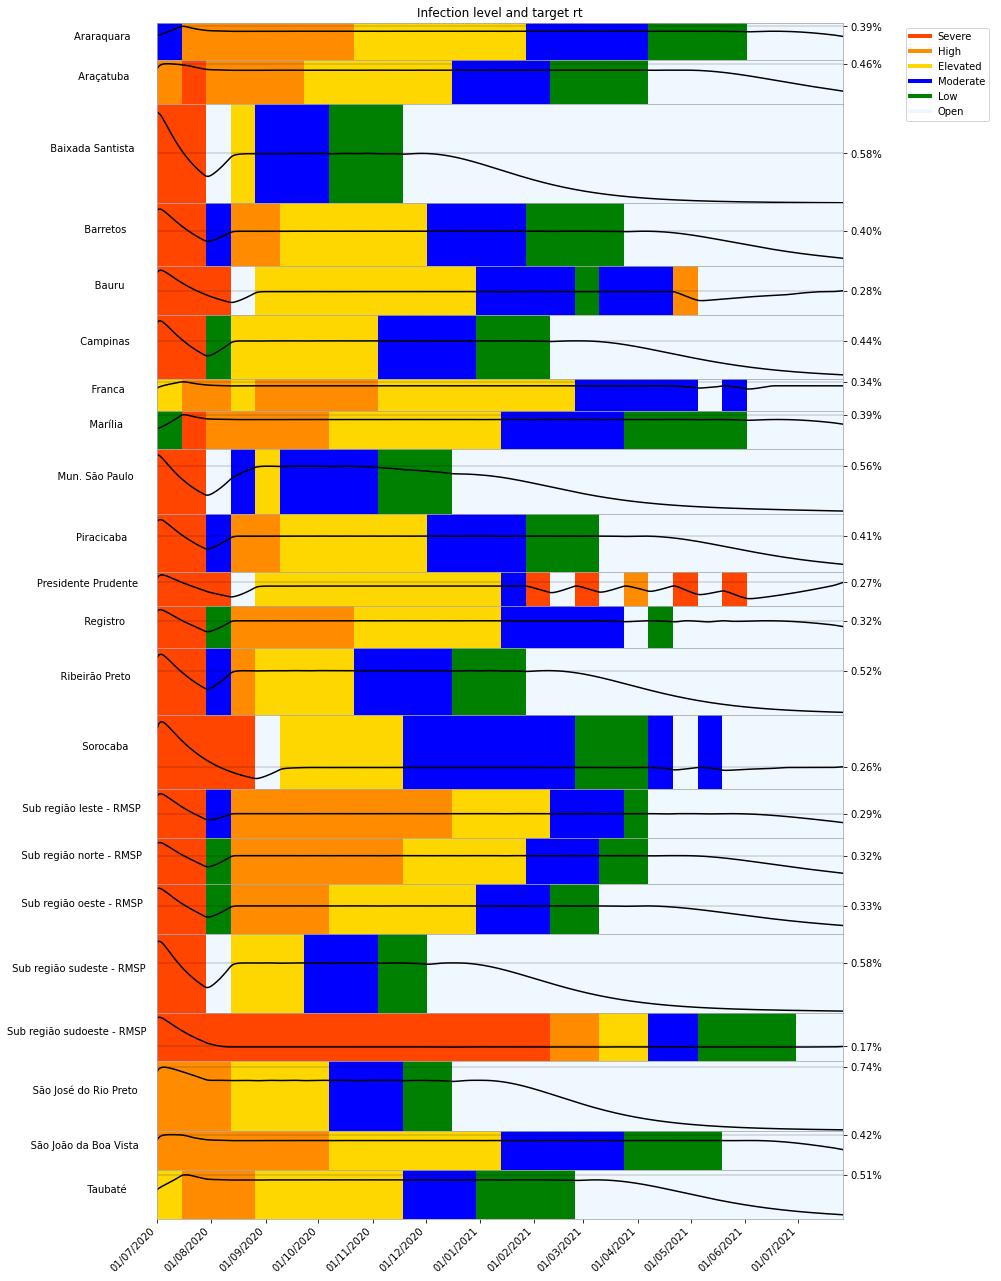

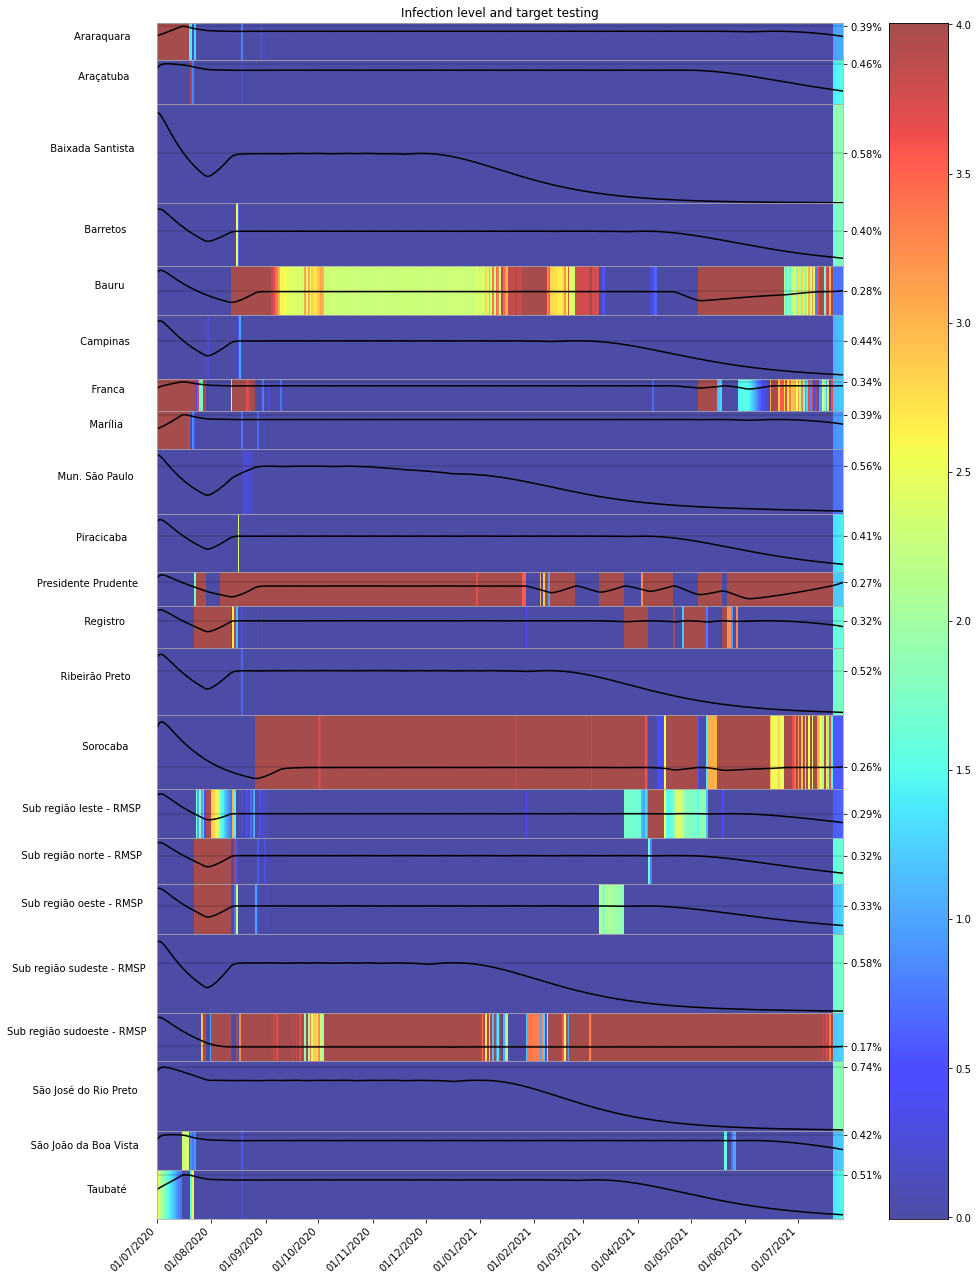

In [32]:
basic_prm["alternate"] = 0.0
budget = 0.0
result_file =  f"results/tests_new_{budget:d}_daily_50k_with_mobility_sp.csv"
figure_file = f"results/tests_new_{budget:d}_daily_50k_with_mobility_sp.png"
run_a_test(basic_prm, result_file, figure_file, cities_data, M, target, force_dif, budget=budget)